# 2009 vs 2014 : India Election Data Analysis

In this case study I will be doing analysis of the result declared in year 2009 and 2014. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Understanding and Cleaning

In [2]:
# 2009 data
LS09Cand = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/LS2009Candidate.csv")
LS09Cand

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8065,U07,Puducherry,3,2009,1,Puducherry,GEN,DR. R. NARAYANAN,M,GEN,59.0,IND,422.0,24.0
8066,U07,Puducherry,3,2009,1,Puducherry,GEN,MUPPADAI MATHIMAHARAJA,M,GEN,45.0,IND,378.0,25.0
8067,U07,Puducherry,3,2009,1,Puducherry,GEN,MURUGAIYAN. K.S,M,GEN,42.0,IND,378.0,26.0
8068,U07,Puducherry,3,2009,1,Puducherry,GEN,I.M. SEKAR,M,GEN,46.0,IND,375.0,27.0


### Let's Explore the data first

In [3]:
LS09Cand['State name'].unique(), len(LS09Cand['State name'].unique())

(array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
        'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
        'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Punjab',
        'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
        'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
        'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
        'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
       dtype=object),
 35)

In [6]:
LS09Cand['PC name'].value_counts()

Chennai South     43
Lucknow           41
CHANDNI CHOWK     41
NEW DELHI         40
Aurangabad        38
                  ..
MIZORAM            4
Chhota Udaipur     4
Lakshadweep        4
Nagaland           3
Kokrajhar          3
Name: PC name, Length: 540, dtype: int64

In [7]:
LS09Cand['PC Type'].value_counts()

GEN    6604
SC     1045
ST      421
Name: PC Type, dtype: int64

In [10]:
LS09Cand['Candidate Sex'].value_counts(), len(LS09Cand)

(M    7475
 F     552
 Name: Candidate Sex, dtype: int64,
 8070)

In [15]:
# 2014 data
LS14Cand = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/LS2014Candidate.csv")
LS14Cand

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,U07,Puducherry,5,2014,1,Puducherry,GEN,PUVALA NAGESWARA RAO,M,GEN,60.0,IND,465,27
8790,U07,Puducherry,5,2014,1,Puducherry,GEN,G. PALANI,M,GEN,59.0,CPI(ML)(L),438,28
8791,U07,Puducherry,5,2014,1,Puducherry,GEN,MARIE UTHRIANATHAN,M,GEN,32.0,SAP,366,29
8792,U07,Puducherry,5,2014,1,Puducherry,GEN,S. CHITRAKALA,F,GEN,37.0,JD(U),309,30


In [16]:
LS14Cand['PC Type'].value_counts()

GEN    7141
SC     1138
ST      500
SC       15
Name: PC Type, dtype: int64

In [17]:
LS14Cand['Candidate Sex'].value_counts()

M    7578
F     668
O       6
Name: Candidate Sex, dtype: int64

### Let's concatenate data of both year 2009 and 2014

In [18]:
LS0914Cand = pd.concat([LS09Cand, LS14Cand])
LS0914Cand

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,U07,Puducherry,5,2014,1,Puducherry,GEN,PUVALA NAGESWARA RAO,M,GEN,60.0,IND,465.0,27.0
8790,U07,Puducherry,5,2014,1,Puducherry,GEN,G. PALANI,M,GEN,59.0,CPI(ML)(L),438.0,28.0
8791,U07,Puducherry,5,2014,1,Puducherry,GEN,MARIE UTHRIANATHAN,M,GEN,32.0,SAP,366.0,29.0
8792,U07,Puducherry,5,2014,1,Puducherry,GEN,S. CHITRAKALA,F,GEN,37.0,JD(U),309.0,30.0


In [19]:
LS0914Cand['Party Abbreviation'].unique(), len(LS0914Cand['Party Abbreviation'].unique())

(array(['TDP', 'INC', 'PRAP', 'BJP', 'BSP', 'IND', 'TRS', 'MCPI(S)',
        'PPOI', 'RPI(A)', 'LSP', 'TPPP', 'IJP', 'BSP(AP)', 'BPD', 'SP',
        'RKSP', 'MUL', 'ANC', 'UWF', 'SAP', 'AJBP', 'AIMIM', 'JD(S)',
        'MANP', 'GRIP', 'SJP(R)', 'CPI', 'CPM', 'RJD', 'BSSP', 'BHSASP',
        'JD(U)', 'RPI', 'RDHP', 'RDMP', 'CPI(ML)(L)', 'PBHP', 'RPI(KH)',
        'RPC(S)', 'BCUF', 'BJSH', 'RRS', nan, 'LB', 'AC', 'PPA', 'AUDF',
        'ASDC', 'NCP', 'RWS', 'BOPF', 'AGP', 'RVNP', 'LJP', 'RCPI(R)',
        'RSPS', 'AIMF', 'JMM', 'BVM', 'AIFB', 'SHS', 'LTSD', 'BJKVP',
        'BLPGL', 'BJJD', 'RSP', 'RPP', 'JGP', 'KSVP', 'RKJP', 'RJJM',
        'ABAS', 'ABJS', 'RSWD', 'AD', 'RMEP', 'PTSS', 'LPSP', 'SBSP',
        'SJTP', 'BMF', 'SLP(L)', 'KVSP', 'ABDBM', 'NBNP', 'BHJAP',
        'BSP(K)', 'JVM', 'BSKP', 'LM', 'JPS', 'EKSP', 'BUDM', 'BJKD',
        'JKM', 'PMSP', 'SSD', 'AJSP', 'RLD', 'STPI', 'MAG', 'UGDP', 'SGF',
        'BNJD', 'MJP', 'LSWP', 'VHS', 'NLHP', 'KKJHS', 'NSCP', 'RSP(S)',
    

In [20]:
# New column for Party Alliance

LS0914Cand['Alliance'] = LS0914Cand['Party Abbreviation']

In [21]:
# Making the substitutions, this is hardcoded from our knowledge of the party alliances

LS0914Cand['Alliance'] = LS0914Cand['Alliance'].replace(to_replace=['INC','NCP', 'RJD', 'DMK', 'IUML', 'JMM','JD(s)','KC(M)','RLD','RSP','CMP(J)','KC(J)','PPI','MD'],value='UPA')
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['BJP','SS', 'LJP', 'SAD', 'RLSP', 'AD','PMK','NPP','AINRC','NPF','RPI(A)','BPF','JD(U)','SDF','NDPP','MNF','RIDALOS','KMDK','IJK','PNK','JSP','GJM','MGP','GFP','GVP','AJSU','IPFT','MPP','KPP','JKPC','KC(T)','BDJS','AGP','JSS','PPA','UDP','HSPDP','PSP','JRS','KVC','PNP','SBSP','KC(N)','PDF','MDPF'],value='NDA')
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['YSRCP','AAAP', 'IND', 'AIUDF', 'BLSP', 'JKPDP', 'JD(S)', 'INLD', 'CPI', 'AIMIM', 'KEC(M)','SWP', 'NPEP', 'JKN', 'AIFB', 'MUL', 'AUDF', 'BOPF', 'BVA', 'HJCBL', 'JVM','MDMK'],value='Others')
LS0914Cand

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0,NDA
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0,BSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,U07,Puducherry,5,2014,1,Puducherry,GEN,PUVALA NAGESWARA RAO,M,GEN,60.0,IND,465.0,27.0,Others
8790,U07,Puducherry,5,2014,1,Puducherry,GEN,G. PALANI,M,GEN,59.0,CPI(ML)(L),438.0,28.0,CPI(ML)(L)
8791,U07,Puducherry,5,2014,1,Puducherry,GEN,MARIE UTHRIANATHAN,M,GEN,32.0,SAP,366.0,29.0,SAP
8792,U07,Puducherry,5,2014,1,Puducherry,GEN,S. CHITRAKALA,F,GEN,37.0,JD(U),309.0,30.0,NDA


### Getting the seats Won by the each Alliance

In [25]:
seats_won = LS0914Cand[(LS0914Cand.Position == 1)].groupby(['Alliance', 'Year'])['Position'].sum().reset_index()
seats_won

,Alliance,Year,Position
0,ADMK,2009,9.0
1,ADMK,2014,37.0
2,AITC,2009,19.0
3,AITC,2014,34.0
4,BJD,2009,14.0
5,BJD,2014,20.0
6,BSP,2009,21.0
7,CPM,2009,16.0
8,CPM,2014,9.0
9,NDA,2009,143.0


In [26]:
# Next we pivot on Alliance, put the Year as the columns and count the positions 
seats_won = seats_won.pivot(index='Alliance', columns='Year', values='Position').reset_index().fillna(0).sort_values([2014,2009], ascending = False).reset_index(drop = True)
seats_won

Year,Alliance,2009,2014
0,NDA,143.0,300.0
1,UPA,245.0,59.0
2,ADMK,9.0,37.0
3,Others,32.0,34.0
4,AITC,19.0,34.0
5,BJD,14.0,20.0
6,SHS,11.0,18.0
7,TDP,6.0,16.0
8,TRS,2.0,11.0
9,CPM,16.0,9.0


# Visualizing 2009 vs 2014

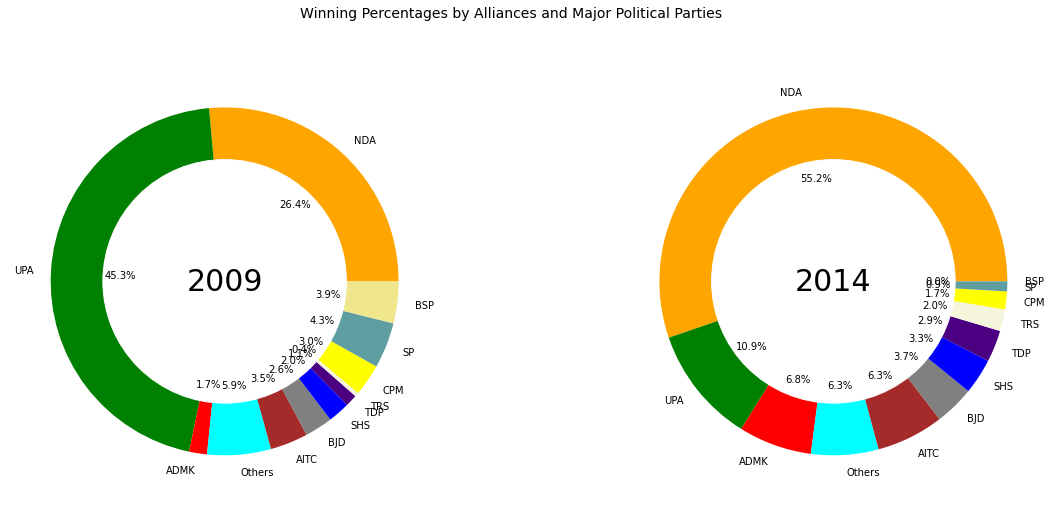

In [30]:
# Seats won by Alliances and Major Political Parties

colors  = ("orange", "green", "red", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow","cadetblue","khaki")

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)

plt.pie(seats_won[2009], labels=seats_won['Alliance'], colors= colors, autopct='%1.1f%%')
my_circle1 = plt.Circle((0,0), 0.7, color = 'white')
fig = plt.gcf() 
fig.suptitle("Winning Percentages by Alliances and Major Political Parties", fontsize = 14)
ax = fig.gca()
ax.add_patch(my_circle1)

label = ax.annotate("2009", xy = (0,0), fontsize = 30, ha = "center", va = "center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.subplot(1,2,2)
plt.pie(seats_won[2014], labels=seats_won['Alliance'], colors=colors,autopct='%1.1f%%')
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("2014", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show()

### Comparing Candidate Categories

In [31]:
LS0914Cand.head()

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0,NDA
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0,BSP


In [32]:
CatWin = LS0914Cand[(LS0914Cand.Position == 1)].groupby(['Candidate Category','Year'])['Position'].sum().reset_index().pivot(index = 'Candidate Category', columns = 'Year', values = 'Position').fillna(0).sort_values([2014,2009], ascending = False).reset_index()
CatWin

Year,Candidate Category,2009,2014
0,GEN,403.0,405.0
1,SC,85.0,85.0
2,ST,53.0,53.0


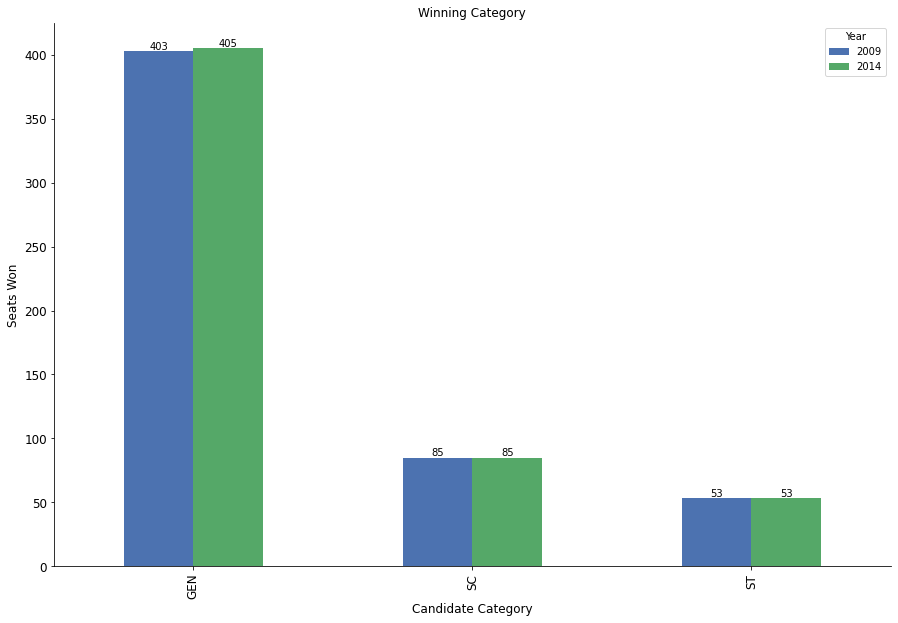

In [48]:

category = ['GEN', 'SC','ST']
plt.style.use('seaborn-deep')

ax = CatWin.plot(kind = 'bar', figsize = (15,10), legend = True, fontsize = 12)
ax.set_title('Winning Category')
ax.set_xlabel('Candidate Category', fontsize = 12)
ax.set_ylabel('Seats Won', fontsize = 12)
ax.set_xticklabels(category)

for i in ax.containers:
    ax.bar_label(i)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [42]:
CatAlliance09 = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2009)].groupby(['Alliance', 'Candidate Category'])['Position'].sum().unstack().reset_index().fillna(0)
CatAlliance09

Candidate Category,Alliance,GEN,SC,ST
0,ADMK,7.0,2.0,0.0
1,AITC,16.0,3.0,0.0
2,BJD,9.0,2.0,3.0
3,BSP,19.0,2.0,0.0
4,CPM,8.0,6.0,2.0
5,NDA,109.0,18.0,16.0
6,Others,22.0,4.0,6.0
7,SHS,9.0,2.0,0.0
8,SP,13.0,10.0,0.0
9,TDP,4.0,1.0,1.0


In [43]:
CatAlliance14 = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2014)].groupby(['Alliance', 'Candidate Category'])['Position'].sum().unstack().reset_index().fillna(0)
CatAlliance14

Candidate Category,Alliance,GEN,SC,ST
0,ADMK,30.0,7.0,0.0
1,AITC,22.0,10.0,2.0
2,BJD,13.0,3.0,4.0
3,CPM,7.0,1.0,1.0
4,NDA,224.0,44.0,32.0
5,Others,26.0,5.0,3.0
6,SHS,15.0,3.0,0.0
7,SP,5.0,0.0,0.0
8,TDP,13.0,3.0,0.0
9,TRS,7.0,2.0,2.0


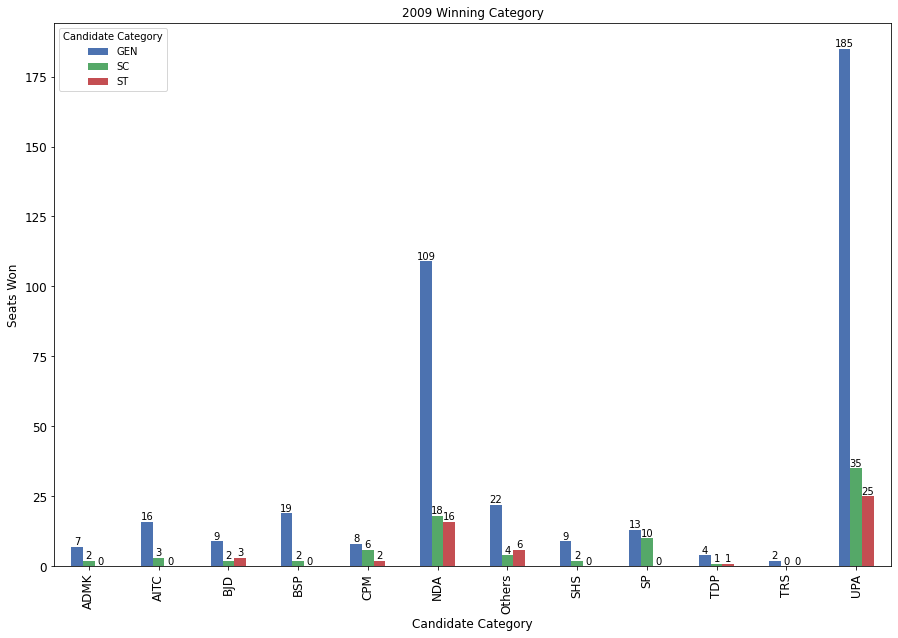

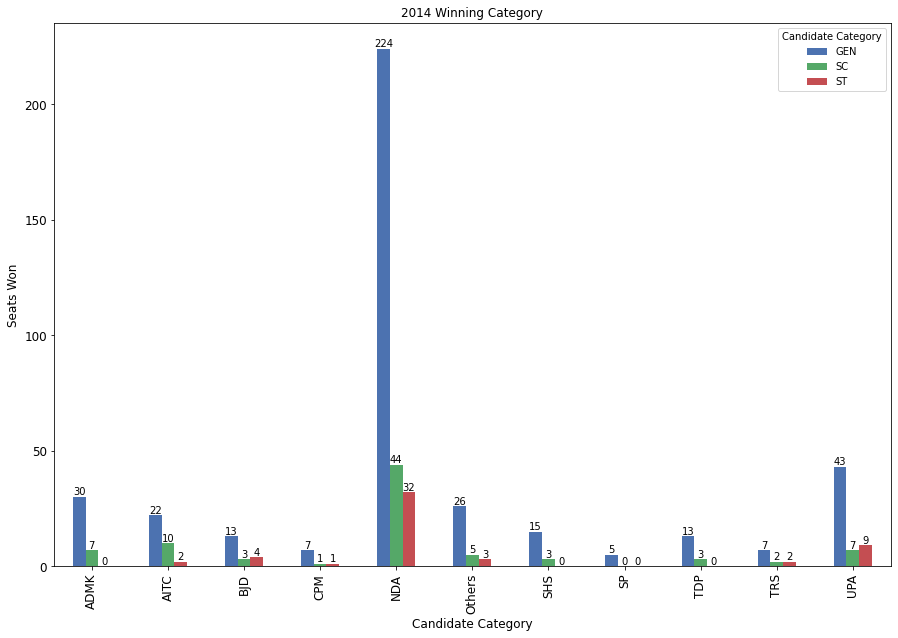

In [47]:
plt.style.use('seaborn-deep')
ax = CatAlliance09.plot(kind = 'bar', figsize = (15,10), legend = True, fontsize = 12)
ax.set_title("2009 Winning Category", fontsize = 12)
ax.set_xlabel("Candidate Category", fontsize = 12)
ax.set_ylabel("Seats Won", fontsize = 12)

labels = CatAlliance09['Alliance']
ax.set_xticklabels(labels)
for i in ax.containers:
    ax.bar_label(i)


ax = CatAlliance14.plot(kind = 'bar', figsize = (15,10), legend = True, fontsize = 12)
ax.set_title("2014 Winning Category", fontsize = 12)
ax.set_xlabel("Candidate Category", fontsize = 12)
ax.set_ylabel("Seats Won", fontsize = 12)

labels = CatAlliance14['Alliance']
ax.set_xticklabels(labels)
for i in ax.containers:
    ax.bar_label(i,)

#### Comparing Age Distriuction of the Winners

In [49]:

Age09 = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2009)]['Candidate Age'].tolist()
Age14 = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2014)]['Candidate Age'].tolist()

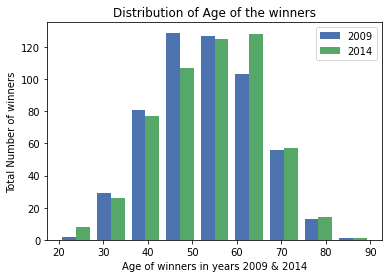

In [50]:
plt.style.use('seaborn-deep')
plt.hist([Age09, Age14], bins = np.linspace(20,90,10))
plt.legend(['2009', '2014'])
plt.xlabel('Age of winners in years 2009 & 2014')
plt.ylabel('Total Number of winners')
plt.title('Distribution of Age of the winners')
plt.show()

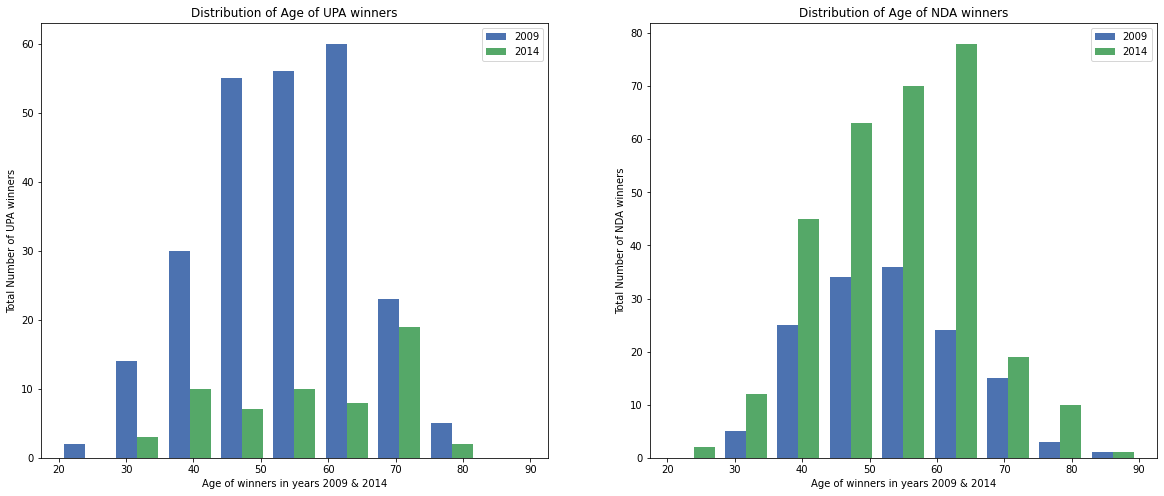

In [51]:
# Age Distribution of Winning Candidates in 2009 & 2014 for NDA & UPA in India Elections
Age09UPA = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2009) & (LS0914Cand.Alliance == 'UPA')]['Candidate Age'].tolist()
Age14UPA = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2014) & (LS0914Cand.Alliance == 'UPA')]['Candidate Age'].tolist()
Age09NDA = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2009) & (LS0914Cand.Alliance == 'NDA')]['Candidate Age'].tolist()
Age14NDA = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2014) & (LS0914Cand.Alliance == 'NDA')]['Candidate Age'].tolist()

plt.style.use('seaborn-deep')
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.hist([Age09UPA ,Age14UPA], bins = np.linspace(20,90,10))
plt.legend(['2009', '2014'])
plt.xlabel('Age of winners in years 2009 & 2014')
plt.ylabel('Total Number of UPA winners')
plt.title('Distribution of Age of UPA winners')


plt.subplot(1,2,2)
plt.hist([Age09NDA, Age14NDA], bins = np.linspace(20,90,10))
plt.legend(['2009', '2014'])
plt.xlabel('Age of winners in years 2009 & 2014')
plt.ylabel('Total Number of NDA winners')
plt.title('Distribution of Age of NDA winners')

plt.show()

## 3. Comparing Gender and Voter Turnout

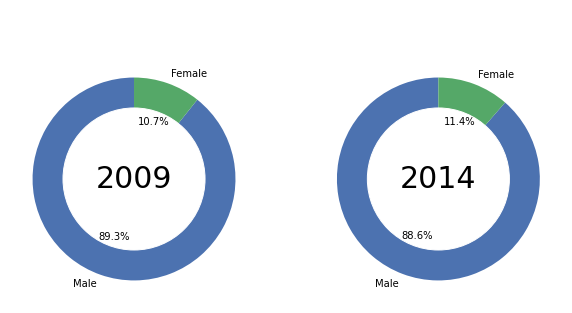

In [52]:
# Gender Distribution of Winning candidates in 2009 & 2014 India elections

Gender09 = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2009)]['Candidate Sex'].value_counts()
Gender14 = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2014)]['Candidate Sex'].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(Gender09, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
my_circle1 = plt.Circle((0,0),0.7, color = 'white')
fig = plt.gcf()
fig.suptitle("Gender Distribution in 2009 & 2014 India Elections", fontsize=14, color = 'white') 
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("2009", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.subplot(1,2,2)
plt.pie(Gender14, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
my_circle1 = plt.Circle((0,0),0.7, color = 'white')
fig = plt.gcf()
fig.suptitle("Gender Distribution in 2009 & 2014 India Elections", fontsize=14, color = 'white') 
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("2014", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show()

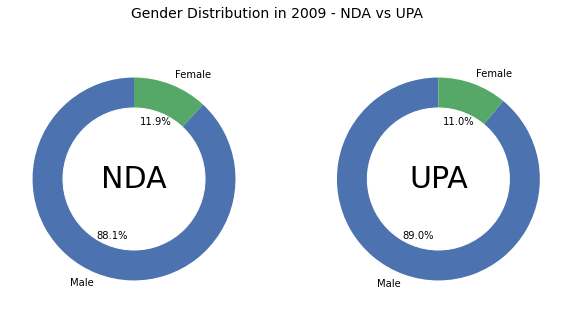

In [53]:
# Gender Distribution of Winning Candidates in 2009 - NDA vs UPA in India Elections

Gender09NDA = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2009) & (LS0914Cand.Alliance == 'NDA')]['Candidate Sex'].value_counts()
Gender09UPA = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2009) & (LS0914Cand.Alliance == 'UPA')]['Candidate Sex'].value_counts()
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

plt.pie(Gender09NDA, labels=['Male','Female'], autopct='%1.1f%%', startangle=90)
my_circle1 = plt.Circle((0,0), 0.7, color = 'white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2009 - NDA vs UPA", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("NDA", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()


plt.subplot(1,2,2)
plt.pie(Gender09UPA, labels=['Male','Female'], autopct='%1.1f%%', startangle=90)
my_circle2 = plt.Circle((0,0), 0.7, color = 'white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2009 - NDA vs UPA", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle2)
label = ax.annotate("UPA", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show()


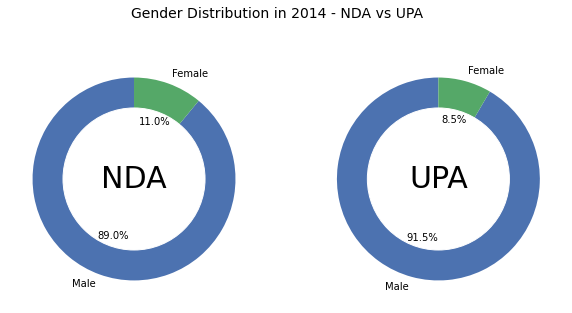

In [54]:
Gender14NDA = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2014) & (LS0914Cand.Alliance == 'NDA')]['Candidate Sex'].value_counts()
Gender14UPA = LS0914Cand[(LS0914Cand.Position == 1) & (LS0914Cand.Year == 2014) & (LS0914Cand.Alliance == 'UPA')]['Candidate Sex'].value_counts()

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.pie(Gender14NDA, labels=['Male','Female'], autopct='%1.1f%%', startangle=90)
my_circle1 = plt.Circle((0,0), 0.7, color = 'white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2014 - NDA vs UPA", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("NDA", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()


plt.subplot(1,2,2)
plt.pie(Gender14UPA, labels=['Male','Female'], autopct='%1.1f%%', startangle=90)
my_circle2 = plt.Circle((0,0), 0.7, color = 'white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2014 - NDA vs UPA", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle2)
label = ax.annotate("UPA", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show()